This is a notebook to understand the general data structure and patterns in the faile banks dataset by FDIC

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file
df = pd.read_csv('failed_banks.csv', encoding='latin-1')

# Display basic information about the dataset
print("Dataset Info:")
print(df.info())



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Bank Name               571 non-null    object
 1   City                    571 non-null    object
 2   State                   571 non-null    object
 3   Cert                    571 non-null    int64 
 4   Acquiring Institution   571 non-null    object
 5   Closing Date            571 non-null    object
 6   Fund                    571 non-null    int64 
dtypes: int64(2), object(5)
memory usage: 31.4+ KB
None


In [2]:

print("\nFirst few rows:")
print(df.head())



First few rows:
                              Bank Name          City  State   Cert   \
0                   Pulaski Savings Bank       Chicago     IL  28611   
1         First National Bank of Lindsay       Lindsay     OK   4134   
2  Republic First Bank dba Republic Bank  Philadelphia     PA  27332   
3                          Citizens Bank      Sac City     IA   8758   
4               Heartland Tri-State Bank       Elkhart     KS  25851   

              Acquiring Institution  Closing Date    Fund  
0                    Millennium Bank     17-Jan-25  10548  
1             First Bank & Trust Co.     18-Oct-24  10547  
2  Fulton Bank, National Association     26-Apr-24  10546  
3          Iowa Trust & Savings Bank      3-Nov-23  10545  
4             Dream First Bank, N.A.     28-Jul-23  10544  


In [3]:

print("\nBasic statistics:")
print(df.describe())



Basic statistics:
              Cert           Fund
count    571.000000    571.000000
mean   31599.534151  10043.980736
std    16476.731096   1109.089411
min       91.000000   4645.000000
25%    20096.500000  10118.500000
50%    32069.000000  10261.000000
75%    35364.000000  10403.500000
max    59017.000000  10548.000000


In [4]:
# Rename columns to lowercase with underscores
df.columns = ['Bank_name', 'City', 'State', 'Cert','Acquiring_institution','Closing_date','Fund']


/tmp/ipykernel_2334058/2828396938.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Closing_date'] = pd.to_datetime(df['Closing_date'])



Top 5 years with most bank closures:
Closing_year
2010    157
2009    140
2011     92
2012     51
2008     25
Name: count, dtype: int64


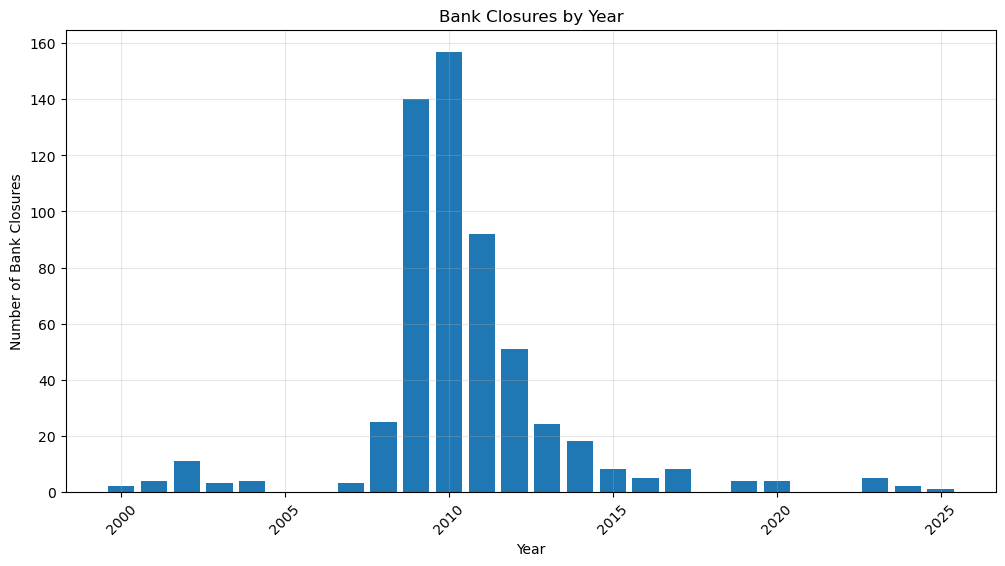

In [5]:
# Convert Closing_date to datetime
df['Closing_date'] = pd.to_datetime(df['Closing_date'])

# Extract year from Closing_date
df['Closing_year'] = df['Closing_date'].dt.year

# Count bank closures by year
yearly_closures = df['Closing_year'].value_counts().sort_index()

# Plot bank closures over time
plt.figure(figsize=(12, 6))
plt.bar(yearly_closures.index, yearly_closures.values)
plt.title('Bank Closures by Year')
plt.xlabel('Year')
plt.ylabel('Number of Bank Closures')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# Print the years with most closures
print("\nTop 5 years with most bank closures:")
print(yearly_closures.sort_values(ascending=False).head())



Top 10 states with most bank closures:
State
GA    93
FL    76
IL    70
CA    43
MN    23
WA    19
AZ    16
MO    16
MI    14
TX    13
Name: count, dtype: int64

Percentage of total closures for top 5 states:
GA: 16.3%
FL: 13.3%
IL: 12.3%
CA: 7.5%
MN: 4.0%


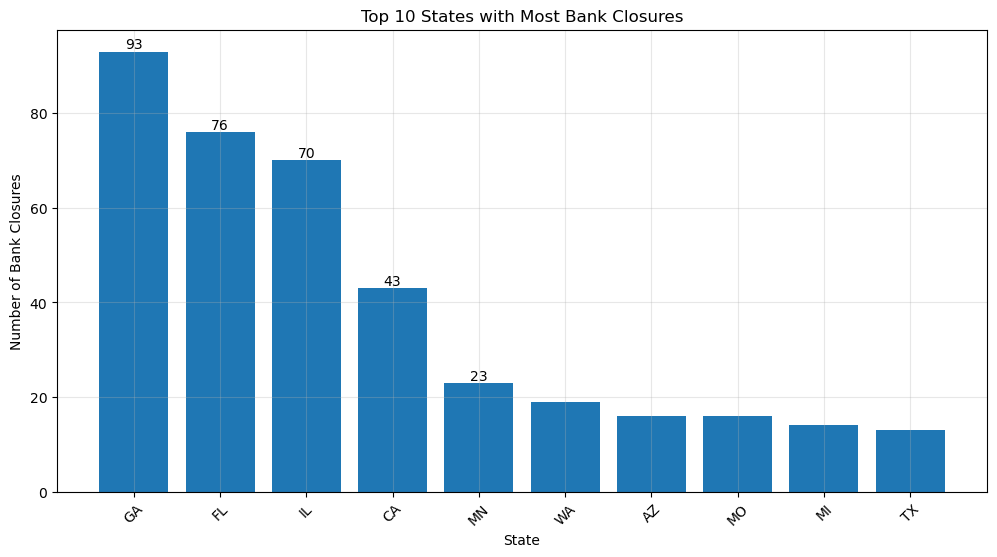

In [6]:
# Analyze bank closures by state
state_closures = df['State'].value_counts()

# Plot top 10 states with most closures
plt.figure(figsize=(12, 6))
plt.bar(state_closures.head(10).index, state_closures.head(10).values)
plt.title('Top 10 States with Most Bank Closures')
plt.xlabel('State')
plt.ylabel('Number of Bank Closures')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# Print statistics about state closures
print("\nTop 10 states with most bank closures:")
print(state_closures.head(10))

# Calculate percentage of total closures for top states
total_closures = state_closures.sum()
print("\nPercentage of total closures for top 5 states:")
for state in state_closures.head(5).index:
    percentage = (state_closures[state] / total_closures) * 100
    print(f"{state}: {percentage:.1f}%")
    plt.text(state, state_closures[state], f'{state_closures[state]}', ha='center', va='bottom')



Top 10 cities with most bank closures:
City
Chicago        21
Atlanta        10
Phoenix         6
Naples          5
Los Angeles     4
Bradenton       4
Scottsdale      4
Las Vegas       4
Alpharetta      4
Miami           4
Name: count, dtype: int64

Percentage of total closures for top 5 cities:
Chicago: 3.7%
Atlanta: 1.8%
Phoenix: 1.1%
Naples: 0.9%
Los Angeles: 0.7%


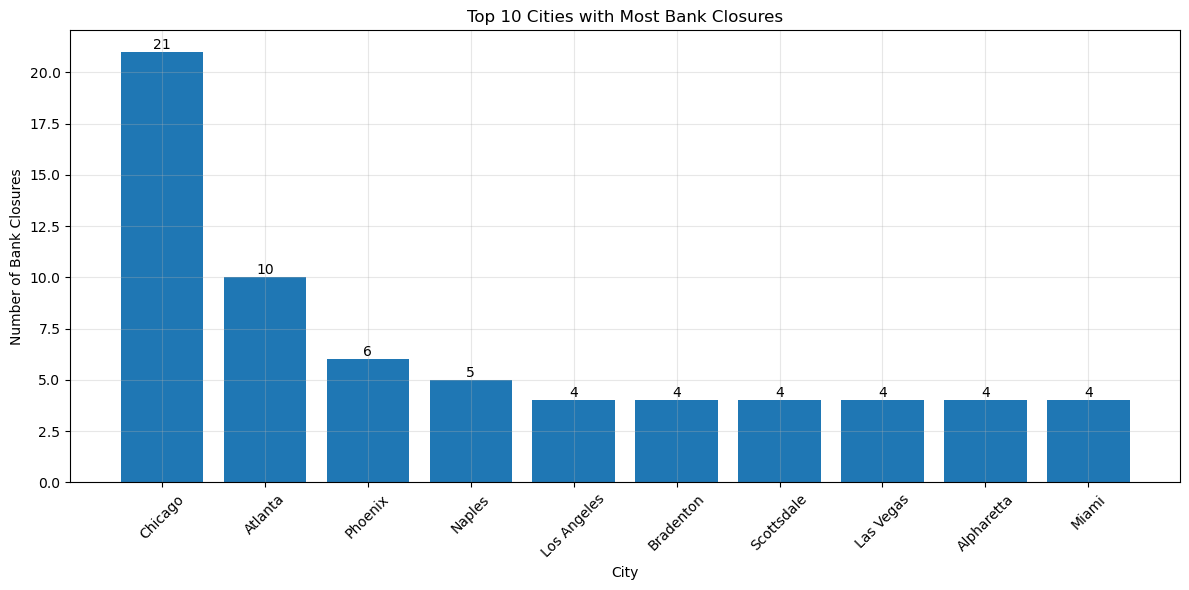

In [7]:
# Analyze bank closures by city
city_closures = df['City'].value_counts()

# Plot top 10 cities with most closures
plt.figure(figsize=(12, 6))
plt.bar(city_closures.head(10).index, city_closures.head(10).values)
plt.title('Top 10 Cities with Most Bank Closures')
plt.xlabel('City')
plt.ylabel('Number of Bank Closures')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# Print statistics about city closures
print("\nTop 10 cities with most bank closures:")
print(city_closures.head(10))

# Calculate percentage of total closures for top cities
total_closures = city_closures.sum()
print("\nPercentage of total closures for top 5 cities:")
for city in city_closures.head(5).index:
    percentage = (city_closures[city] / total_closures) * 100
    print(f"{city}: {percentage:.1f}%")


# Ensure all city names are visible and add percentage labels
for i, (city, count) in enumerate(city_closures.head(10).items()):
    percentage = (count / total_closures) * 100
    plt.text(i, count, f'{count}', ha='center', va='bottom')
plt.tight_layout()




In [8]:
df.columns

Index(['Bank_name', 'City', 'State', 'Cert', 'Acquiring_institution',
       'Closing_date', 'Fund', 'Closing_year'],
      dtype='object')


Top 10 states with most bank closures (2007-2015):
State
GA    91
FL    72
IL    63
CA    40
MN    23
WA    19
MO    16
AZ    15
MI    13
NV    12
Name: count, dtype: int64


NameError: name 'df_2010_2015' is not defined

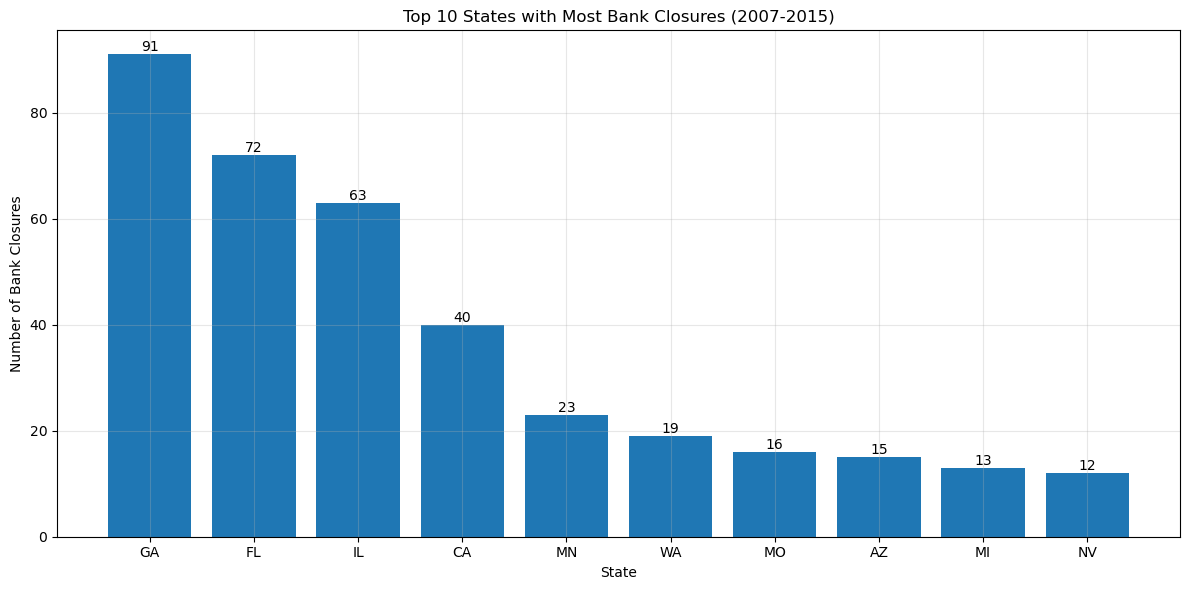

In [10]:
# Filter data for 2010-2015 period
df_2007_2015 = df[(df['Closing_date'].dt.year >= 2007) & (df['Closing_date'].dt.year <= 2015)]

# Get state closures for this period
state_closures_2007_2015 = df_2007_2015['State'].value_counts()

# Plot top states for 2010-2015
plt.figure(figsize=(12, 6))
plt.bar(state_closures_2007_2015.head(10).index, state_closures_2007_2015.head(10).values)
plt.title('Top 10 States with Most Bank Closures (2007-2015)')
plt.xlabel('State')
plt.ylabel('Number of Bank Closures')
plt.grid(True, alpha=0.3)

# Add value labels on bars
for i, v in enumerate(state_closures_2007_2015.head(10)):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.tight_layout()

# Print statistics
print("\nTop 10 states with most bank closures (2007-2015):")
print(state_closures_2007_2015.head(10))

# Get city closures for this period
city_closures_2010_2015 = df_2010_2015['City'].value_counts()

# Plot top cities for 2010-2015
plt.figure(figsize=(12, 6))
plt.bar(city_closures_2007_2015.head(10).index, city_closures_2007_2015.head(10).values)
plt.title('Top 10 Cities with Most Bank Closures (2007-2015)')
plt.xlabel('City')
plt.ylabel('Number of Bank Closures')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# Add value labels on bars
for i, v in enumerate(city_closures_2007_2015.head(10)):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.tight_layout()

# Print statistics
print("\nTop 10 cities with most bank closures (2007-2015):")
print(city_closures_2007_2015.head(10))


In [ ]:
# Get acquiring institution counts for 2010-2015
acquiring_inst_2007_2015 = df_2007_2015['Acquiring_institution'].value_counts()

# Plot top acquiring institutions for 2010-2015
plt.figure(figsize=(12, 6))
plt.bar(acquiring_inst_2007_2015.head(10).index, acquiring_inst_2007_2015.head(10).values)
plt.title('Top 10 Acquiring Institutions (2010-2015)')
plt.xlabel('Acquiring Institution')
plt.ylabel('Number of Banks Acquired')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)

# Add value labels on bars
for i, v in enumerate(acquiring_inst_2007_2015.head(10)):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.tight_layout()

# Print statistics
print("\nTop 10 acquiring institutions (2007-2015):")
print(acquiring_inst_2007_2015.head(10))



Top 10 acquiring institutions in Chicago:
Acquiring_institution
Northbrook Bank & Trust Company    4
MB Financial Bank, N.A.            3
Republic Bank of Chicago           2
State Bank of Texas                2
Royal Savings Bank                 1
Millennium Bank                    1
Providence Bank, LLC               1
United Fidelity Bank, fsb          1
Hinsdale Bank & Trust Company      1
Liberty Bank and Trust Company     1
Name: count, dtype: int64


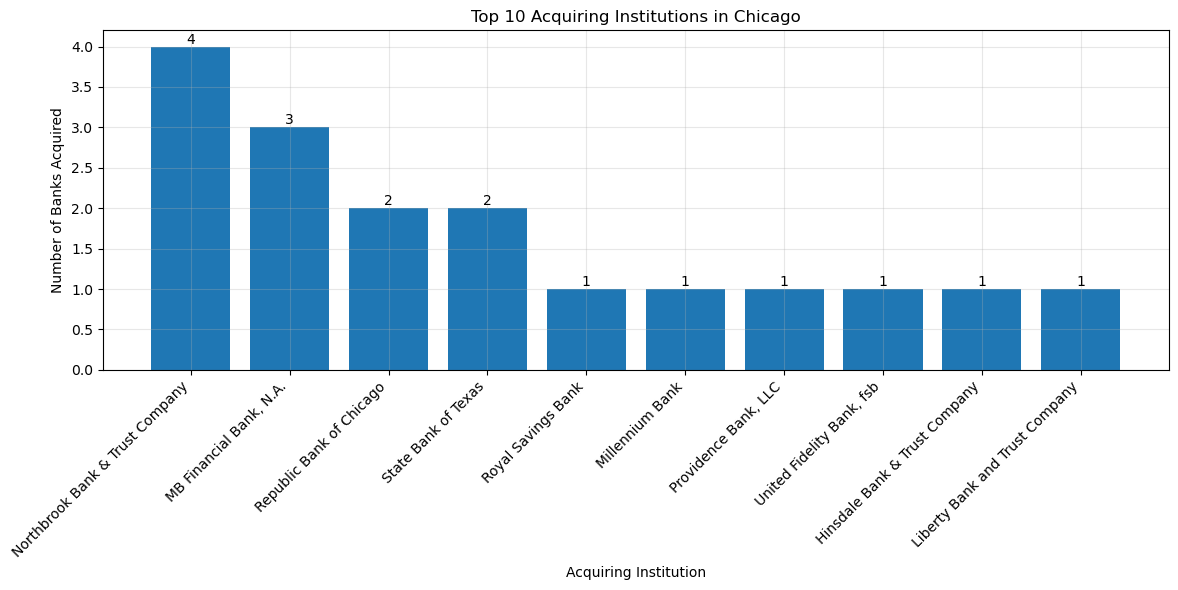

In [11]:
# Filter for banks in Chicago
chicago_banks = df[df['City'] == 'Chicago']

# Get acquiring institution counts for Chicago
chicago_acquiring_inst = chicago_banks['Acquiring_institution'].value_counts()

# Plot top acquiring institutions for Chicago
plt.figure(figsize=(12, 6))
plt.bar(chicago_acquiring_inst.head(10).index, chicago_acquiring_inst.head(10).values)
plt.title('Top 10 Acquiring Institutions in Chicago')
plt.xlabel('Acquiring Institution') 
plt.ylabel('Number of Banks Acquired')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)

# Add value labels on bars
for i, v in enumerate(chicago_acquiring_inst.head(10)):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.tight_layout()

# Print statistics
print("\nTop 10 acquiring institutions in Chicago:")
print(chicago_acquiring_inst.head(10))


In [23]:
# Import required libraries if not already imported
import folium
from folium import plugins
import numpy as np

# Get state-level counts
state_counts = df['State'].value_counts()

# Create base map centered on US
m = folium.Map(location=[39.8283, -98.5795], zoom_start=4)

# Add choropleth layer
folium.Choropleth(
    geo_data='https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/us-states.json',
    name='choropleth',
    data=state_counts,
    columns=[state_counts.index, state_counts.values],
    key_on='feature.id',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Number of Bank Closures by State'
).add_to(m)

# Add hover functionality
folium.LayerControl().add_to(m)

# Display the map
m
# Save the map as HTML first
m.save('bank_closures_map.html')
